1- Faça a leitura do arquivo "Churn_Modelling_2.csvLinks to an external site." disponível na pasta "ChurnLinks to an external site." no repositório GitHub da disciplinaLinks to an external site. e armazene numa variável como um dataframe;


In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np


!git clone https://github.com/malegopc/DSBD

df = pd.read_csv("/content/DSBD/Datasets/Churn/Churn_Modelling_2.csv")
df

fatal: destination path 'DSBD' already exists and is not an empty directory.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


2- Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember".

In [70]:
df.dropna(subset=['IsActiveMember'], inplace = True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


3- Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável.

In [71]:
df['NumOfProducts'].fillna(df['NumOfProducts'].mean(), inplace = True)
print(df['NumOfProducts'].mean())

1.5301724137931034


4- Crie uma variável (array) X que contenha os valores apenas dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo;

In [72]:
x = df.iloc[:, 3:-1].values
x

array([[619, 'France', 'Female', ..., 1, 1.0, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1.0, 112542.58],
       [502, 'France', 'Female', ..., 1, 0.0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1.0, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0.0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0.0, 38190.78]], dtype=object)

5- Crie uma variável (array) y que contenha apenas a última coluna  ("Exited"). Esta é a variável destino ("target" ou saída);

In [73]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, ..., 1, 1, 0])

6- Codifique a coluna da variável X correspondente a variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

In [74]:
label_encoder_gender = LabelEncoder()
x[:, 2] = label_encoder_gender.fit_transform(x[:, 2])

7- Codifique a coluna da variável X correspondente a variável categórica "Geography" como numérica por meio de Codificação de Variável Fictícia (Dummy Variable Encoding). Observe que há 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformerLinks to an external site. da biblioteca scikit-learn. Alternativamente, você pode utilizar a função pandas.get_dummiesLinks to an external site..

In [75]:
column_transformer = ColumnTransformer (transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')

x = np.array(column_transformer.fit_transform(x))

print(x)

[[1.0 0.0 0.0 ... 1 1.0 101348.88]
 [0.0 0.0 1.0 ... 0 1.0 112542.58]
 [1.0 0.0 0.0 ... 1 0.0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1.0 42085.58]
 [0.0 1.0 0.0 ... 1 0.0 92888.52]
 [1.0 0.0 0.0 ... 1 0.0 38190.78]]


8- Divida as variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste;

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(7489, 12)
(2497, 12)


9- Faça a padronização (escalonamento) dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn;


In [77]:
scaler = StandardScaler()

x_train[:, :] = scaler.fit_transform(x_train[:, :])
x_test[:, :] = scaler.transform(x_test[:, :])

print(x_train)

[[-1.0044162141913056 1.725446058223905 -0.5717480376602586 ...
  0.6424580226635523 -1.0296832487941254 1.3674441628966925]
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 -1.0562282016877123]
 [-1.0044162141913056 -0.5795602796353215 1.749022181330352 ...
  0.6424580226635523 -1.0296832487941254 -0.2900669906785162]
 ...
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 -1.0296832487941254 1.567105601924653]
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 -1.26181425959056]
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 1.5693524612808165]]


In [78]:
print(x_test)

[[0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 -0.5572247559916981]
 [-1.0044162141913056 1.725446058223905 -0.5717480376602586 ...
  0.6424580226635523 -1.0296832487941254 1.5893862871458582]
 [-1.0044162141913056 1.725446058223905 -0.5717480376602586 ...
  0.6424580226635523 -1.0296832487941254 -1.7376301656745352]
 ...
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 -1.5078563713931972]
 [0.9956032030058991 -0.5795602796353215 -0.5717480376602586 ...
  0.6424580226635523 -1.0296832487941254 -1.1624677318002903]
 [-1.0044162141913056 1.725446058223905 -0.5717480376602586 ...
  0.6424580226635523 0.9711724466441736 1.7174434613691325]]


ATIVIDADE 6.2 _____________________________________________________________________________

1- Excluindo os 3 primeiros atributos (RowNumber, CustomerId e Surname)

In [79]:
df = df.iloc[:, 3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


Criando o modelo de rede neural

In [80]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import cross_val_score

model = Sequential()
# 1a. camada escondida com 32 neurônios - 12 entradas (atributos)
model.add(Dense(32, input_dim=12, kernel_initializer = 'he_uniform', activation='relu'))
# 2a. camada escondida com 16 neurônios
model.add(Dense(16, kernel_initializer = 'he_uniform', activation='relu'))
# Camada de saída com 01 neurônio - Classificação binária (Democrat or Republican)
model.add(Dense(1, activation='sigmoid'))
# Sumário do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                416       
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compilando o modelo de rede neural


In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Treinando o modelo de rede neural

In [82]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
history = model.fit(x_train, y_train, epochs=100, batch_size = 8, validation_data=(x_test, y_test))

Epoch 1/100
937/937 [==============================] - 5s 4ms/step - loss: 0.4356 - accuracy: 0.8193 - val_loss: 0.4013 - val_accuracy: 0.8378
Epoch 2/100
937/937 [==============================] - 2s 3ms/step - loss: 0.3746 - accuracy: 0.8442 - val_loss: 0.3757 - val_accuracy: 0.8490
Epoch 3/100
937/937 [==============================] - 2s 3ms/step - loss: 0.3540 - accuracy: 0.8533 - val_loss: 0.3665 - val_accuracy: 0.8526
Epoch 4/100
937/937 [==============================] - 2s 3ms/step - loss: 0.3436 - accuracy: 0.8590 - val_loss: 0.3604 - val_accuracy: 0.8578
Epoch 5/100
937/937 [==============================] - 2s 2ms/step - loss: 0.3393 - accuracy: 0.8594 - val_loss: 0.3579 - val_accuracy: 0.8566
Epoch 6/100
937/937 [==============================] - 3s 3ms/step - loss: 0.3359 - accuracy: 0.8602 - val_loss: 0.3549 - val_accuracy: 0.8586
Epoch 7/100
937/937 [==============================] - 3s 4ms/step - loss: 0.3335 - accuracy: 0.8611 - val_loss: 0.3562 - val_accuracy: 0.8538

4 - Análisando a função *loss* (erro/perda)

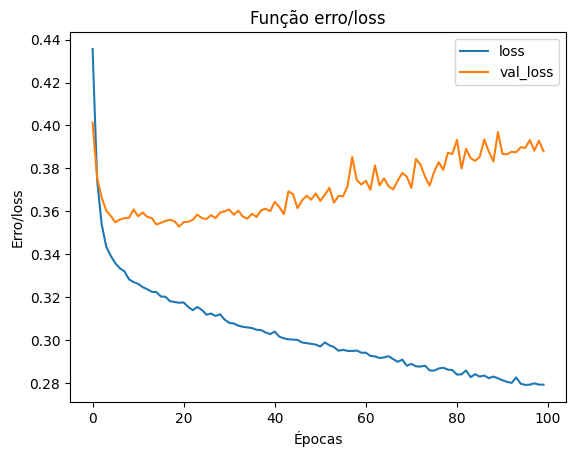

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Erro/loss')
plt.title('Função erro/loss')
plt.legend(['loss', 'val_loss'])
plt.show()

4 - Análisando a métrica de desempenho (acurácia)

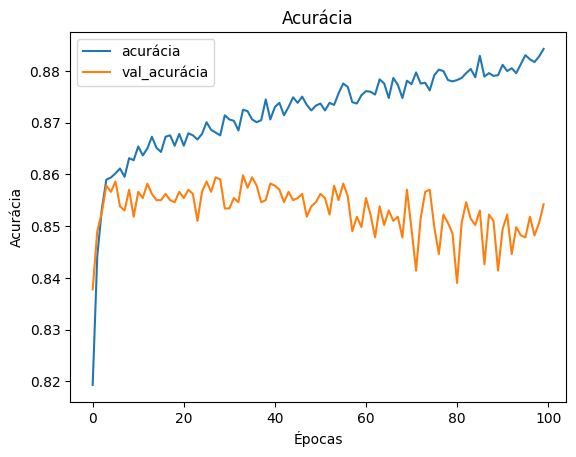

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Épocas")
plt.ylabel('Acurácia')
plt.title('Acurácia')
plt.legend(['acurácia', 'val_acurácia'])
plt.show()

5 - Calculando a matriz de confusão sobre os dados de teste



In [85]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

79/79 [==============================] - 0s 1ms/step
[[1864  124]
 [ 240  269]]


5 - Calculando a matriz em todo o modelo

In [87]:
y_pred2 = model.predict(x)
y_pred2 = (y_pred2 > 0.5)

cm = confusion_matrix(y, y_pred)
print(cm)

ValueError: ignored

In [ ]:
print(np.around(model.predict(x[:5,:])))

In [ ]:
x1 = np.array([x[0]])
pred = model.predict(x1)
print(type(pred)) # array numpy
print(pred)
print(round(pred[0][0]))
#print(np.around(pred))